Load packages

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

In [2]:
#related files
power = 1.2
hour = 60
batch = 1
burst = 4
df = pd.read_csv('/home/tmp2/PycharmProjects/fish_llr/Analysis_Results/stat_data/'\
                 'burdur_{}w_{}h_batch{}_burst{}.csv'.format(power, hour, batch, burst))

In [3]:
# df.end divide by 60 to get miniutes
df['end_min'] = df['end'] // 60 + 1

<AxesSubplot:title={'center':'burdur'}, xlabel='label'>

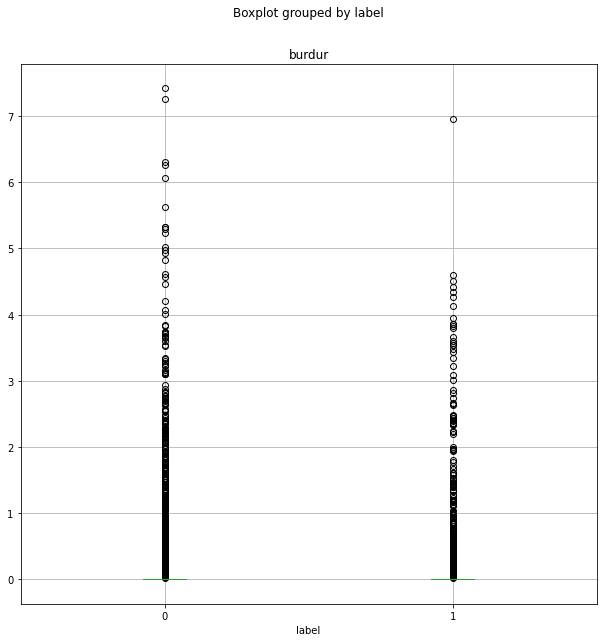

In [4]:
# groupby end_min and aname, sum the burdur
df_group = df.groupby(['label', 'aname', 'end_min'])['burdur'].sum().reset_index()
# boxplot for burdur, each label has one box
df_group.boxplot(by='label', column='burdur', figsize=(10, 10))

<Figure size 720x360 with 0 Axes>

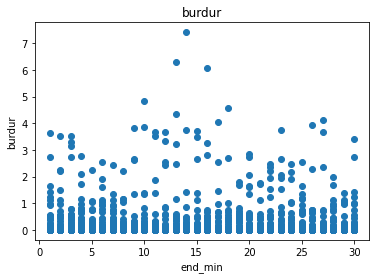

In [5]:
df_baseline = df_group[df_group['end_min'] <= 30]

plt.figure(figsize=(10, 5))
#plot end_min and burdur, each aname as one line
df_baseline.plot(x='end_min', y='burdur', style='o', legend=False)
plt.xlabel('end_min')
plt.ylabel('burdur')
plt.title('burdur')
plt.show()

In [6]:
# end_min equal to 30 or 31
df_baseline = df_group[df_group['end_min'] <= 30]
# mean for each aname
df_baseline_mean = df_baseline.groupby('aname')['burdur'].mean().reset_index()

<Figure size 720x360 with 0 Axes>

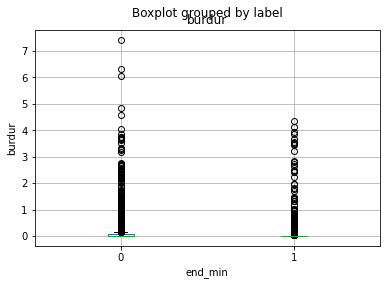

In [7]:
plt.figure(figsize=(10, 5))
#boxplot for burdur, each label*end_min as one box
df_baseline.boxplot(column='burdur', by=['label'], showfliers=True)
plt.xlabel('end_min')
plt.ylabel('burdur')
plt.show()
